In [1]:
from PIL import Image

def resize_image(image_path, size=512):
    # Open the image
    image = Image.open(image_path)

    # Get original image dimensions
    width, height = image.size

    # Determine the scaling factor to resize the image to fit into a square of size x size
    scaling_factor = max(size / width, size / height)

    # Calculate new dimensions
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)

    # Resize the image
    resized_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    # Create a new blank square image of size x size
    square_image = Image.new("RGB", (size, size), (255, 255, 255))

    # Paste the resized image onto the square canvas, centering it
    square_image.paste(resized_image, ((size - new_width) // 2, (size - new_height) // 2))

    return square_image

### Resize the image

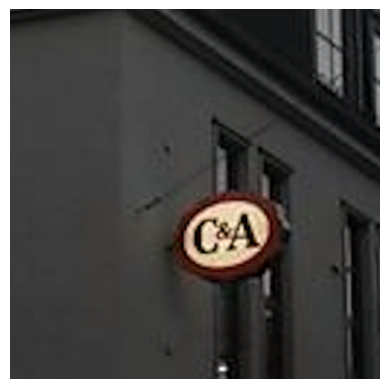

In [16]:
import matplotlib.pyplot as plt

fp = 'low_quality.png'
resized_image = resize_image(fp)
# resized_image.save('output_image.jpg')

plt.axis('off')  # Turn off axis
plt.imshow(resized_image)

resized_image.save('background.jpg')

### Visualize the bounding box

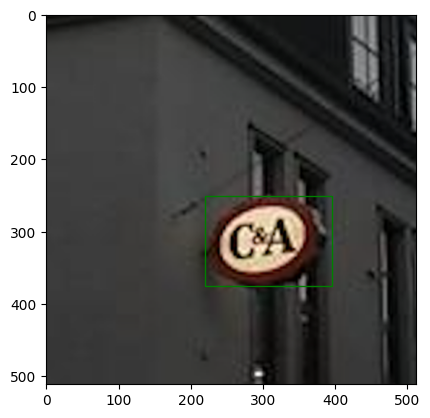

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(resized_image)

'''
Define the bounding box coordinates (x, y, width, height)

ADJUST THIS BY HAND until it looks good
'''
# Define the bounding box coordinates (x, y, width, height)
logo_x = 220
logo_y = 250
logo_w = 175
logo_h = 125

bbox = (logo_x, logo_y, logo_w, logo_h) 

# Create a Rectangle patch
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the axis
ax.add_patch(rect)

# Show the image with bounding box
plt.show()

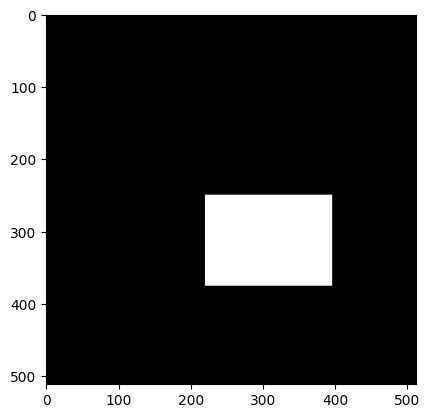

In [28]:
from PIL import Image, ImageDraw
'''
Generate the mask from the bounding box
'''
def bbox_to_mask(image_size, bbox):
    # Image size: (width, height)
    # Create a new image for the mask
    mask = Image.new('L', image_size, 0)

    # Create a drawing context
    draw = ImageDraw.Draw(mask)

    # Draw the bounding box on the mask
    draw.rectangle(bbox, fill=255)

    return mask

bbox = (logo_x, logo_y, logo_x + logo_w, logo_y + logo_h)

image_size = (512, 512)

mask = bbox_to_mask(image_size, bbox)

plt.imshow(mask, cmap='gray')

mask_name = 'mask2.jpg'
mask.save(mask_name)